# Task 2: Annotated Signal Exploration
Generate plots around labeled events and explain raw signal patterns.

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load watch dataset
def load_watch_accel(subject_id=1600,
                     root_dir="wisdm-dataset"):
    """
    Load raw watch accelerometer data for one subject
    from an *unzipped* WISDM-51 directory.

    Expects:
        {root_dir}/raw/watch/accel/data_{subject_id}_accel_watch.txt
    """
    fname = os.path.join(
        root_dir,
        "raw", "watch", "accel",
        f"data_{subject_id}_accel_watch.txt"
    )

    cols = ["subject", "activity", "timestamp", "x", "y", "z"]
    df = pd.read_csv(fname, header=None, names=cols)

    # normalize the data
    df["z"] = df["z"].astype(str).str.rstrip(";")

    # convert data into numeric
    num_cols = ["subject", "timestamp", "x", "y", "z"]
    df[num_cols] = df[num_cols].apply(pd.to_numeric)

    return df

df_watch = load_watch_accel(1600)

In [3]:
# helper function for activity window
def get_activity_window(df, activity_code, window_seconds=9, sample_rate=20):
    df_act = df[df["activity"] == activity_code].reset_index(drop=True)
    n_needed = window_seconds * sample_rate
    if len(df_act) < n_needed:
        return df_act
    start_idx = (len(df_act) // 2) - (n_needed // 2)
    end_idx = start_idx + n_needed
    window = df_act.iloc[start_idx:end_idx].copy()
    window["t"] = np.arange(len(window)) / sample_rate
    return window

In [4]:
# define our list of activities
activities = {
    "F": "Typing",
    "G": "Brushing Teeth",
    "H": "Eating Soup",
    "I": "Eating Chips",
    "J": "Eating Pasta",
    "K": "Drinking from Cup",
    "L": "Eating Sandwich",
    "O": "Playing Catch w/ Tennis Ball",
    "P": "Dribbling (Basketball)",
    "Q": "Writing",
    "R": "Clapping",
    "S": "Folding Clothes"
}

In [5]:
windows = {code: get_activity_window(df_watch, code) for code in activities.keys()}

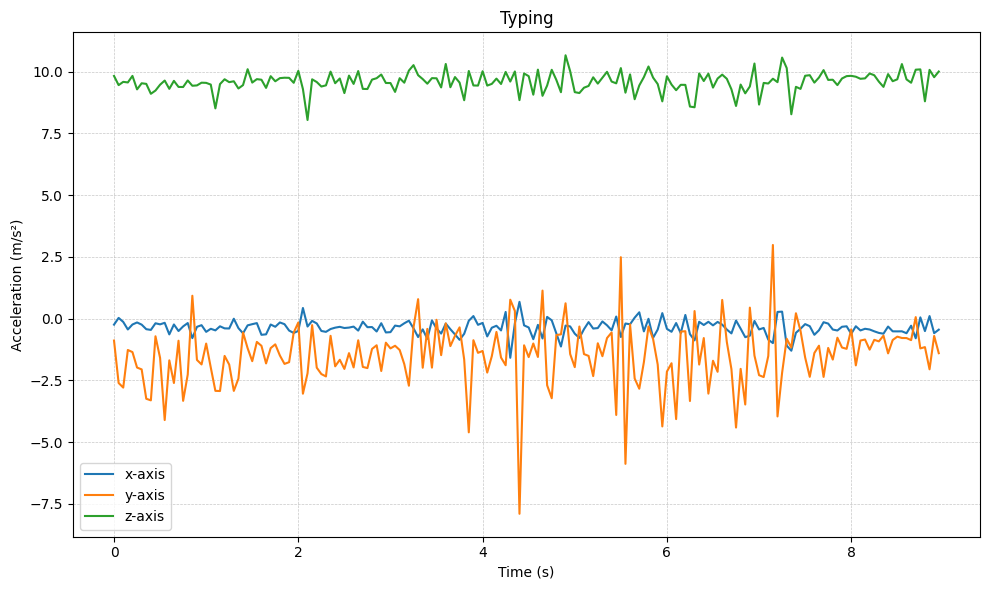

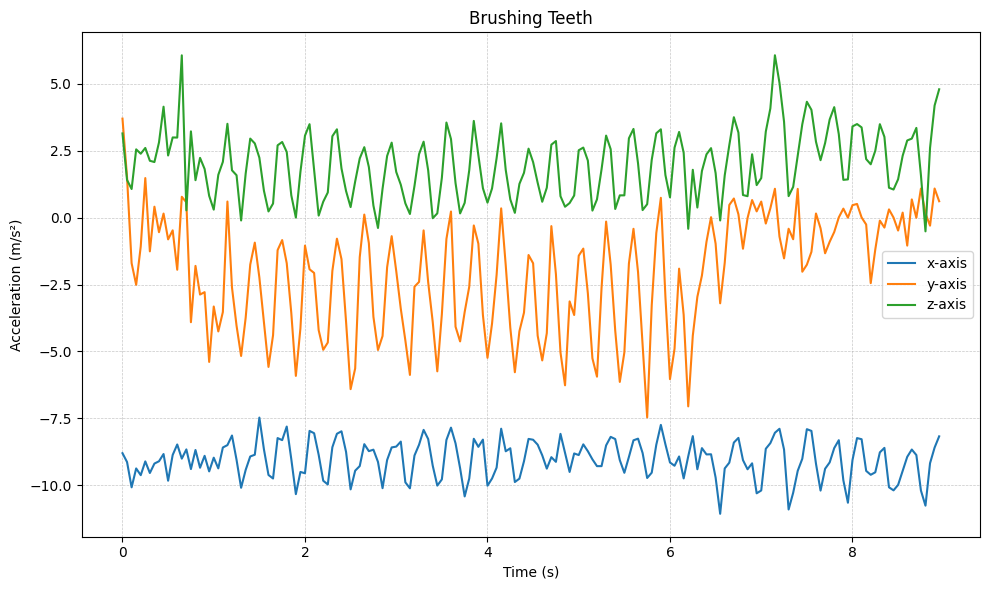

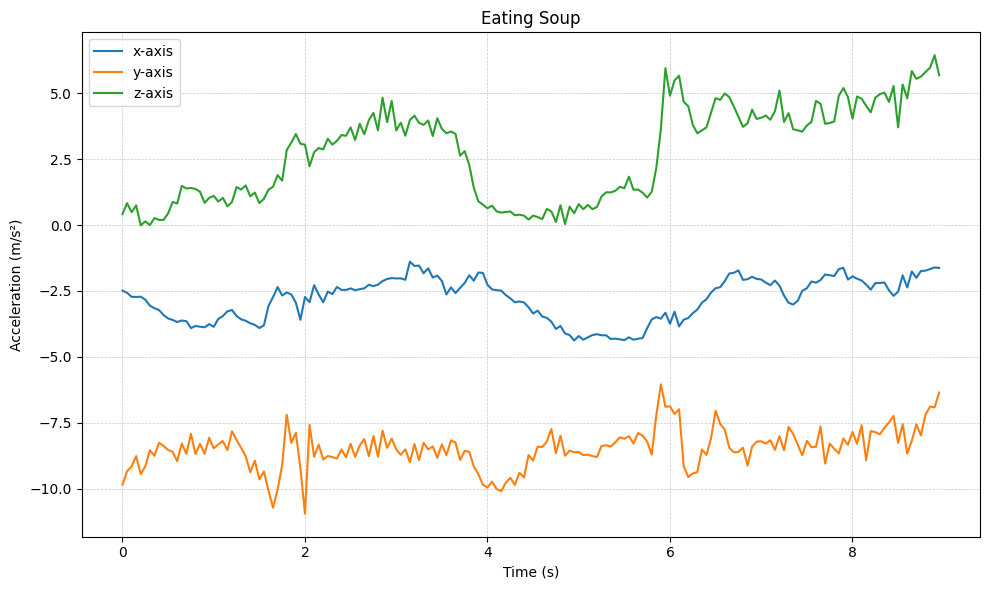

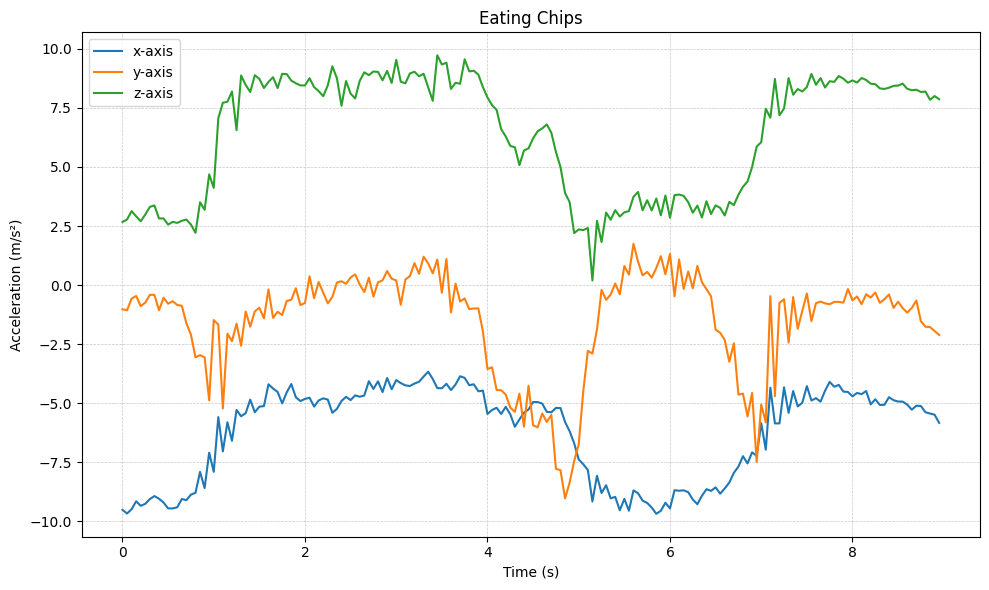

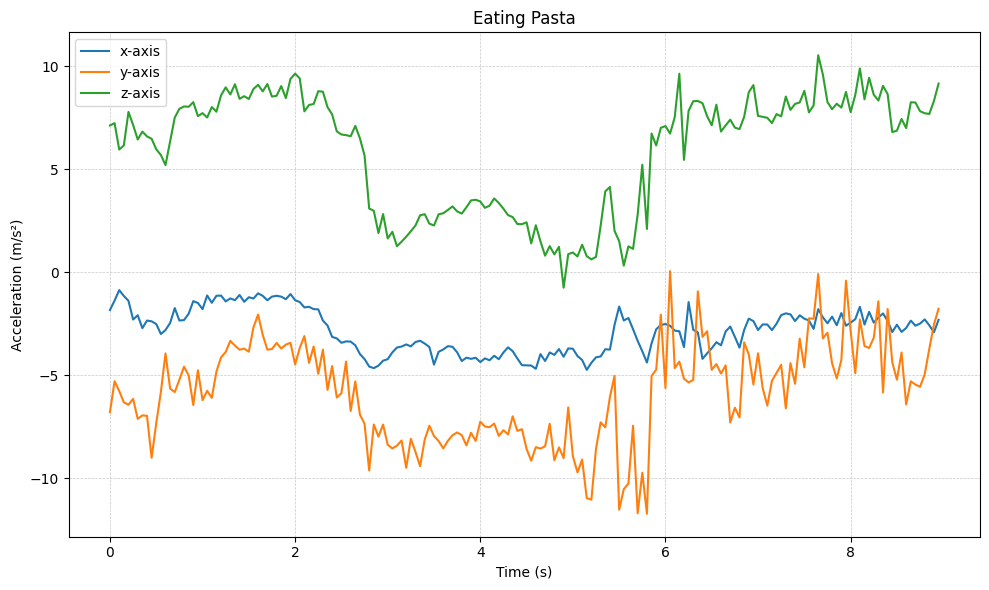

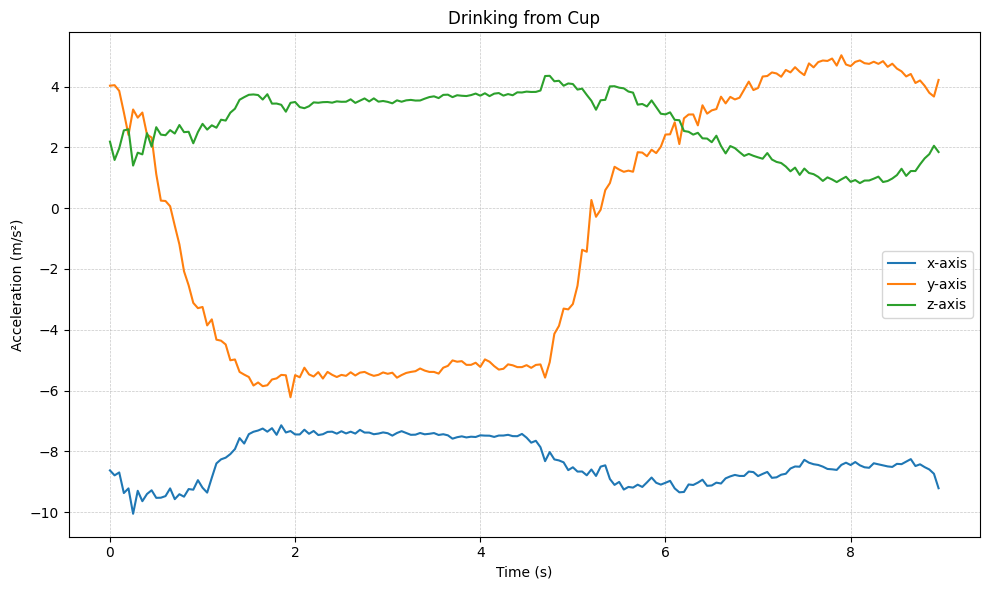

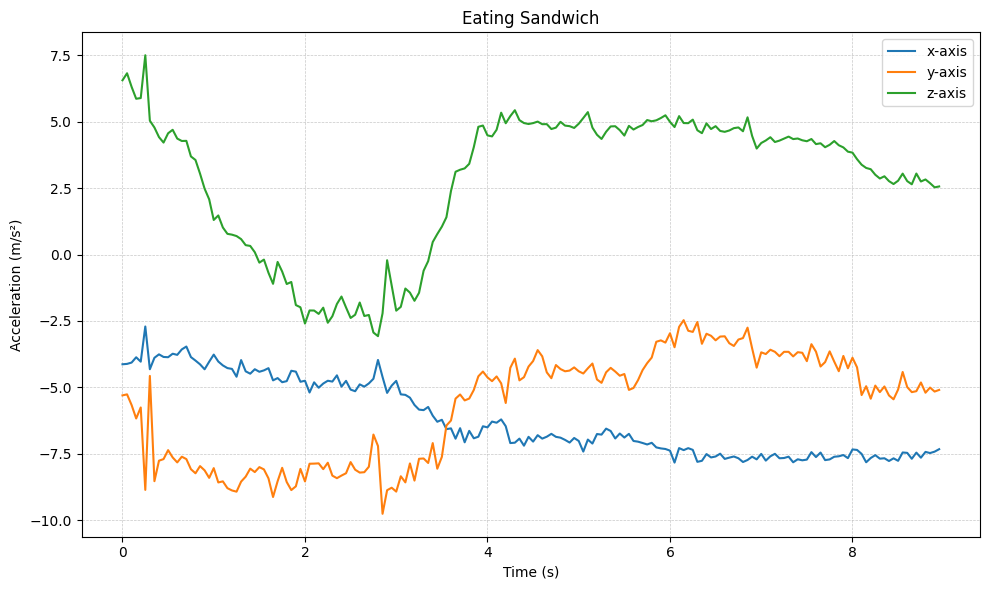

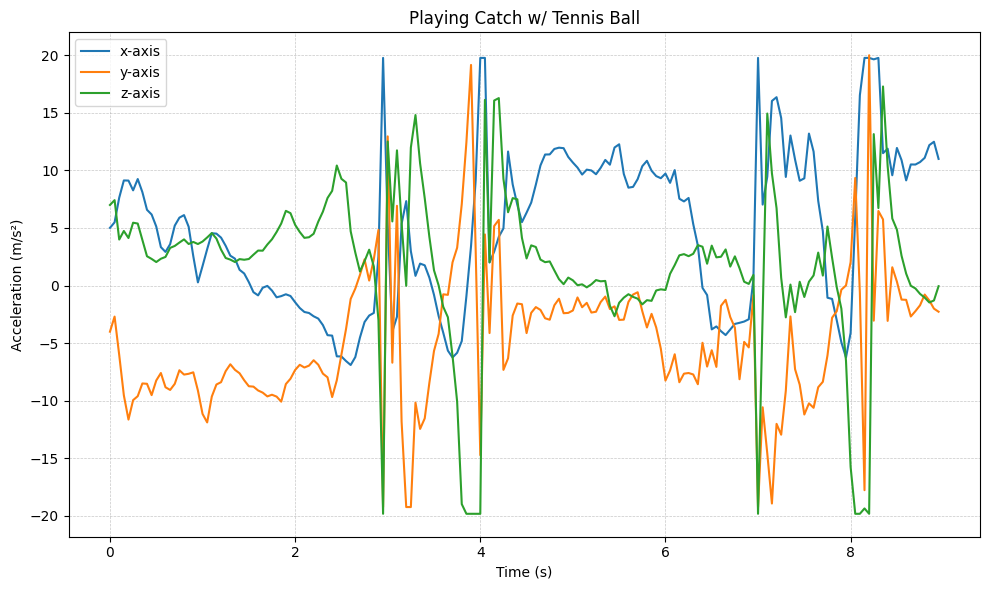

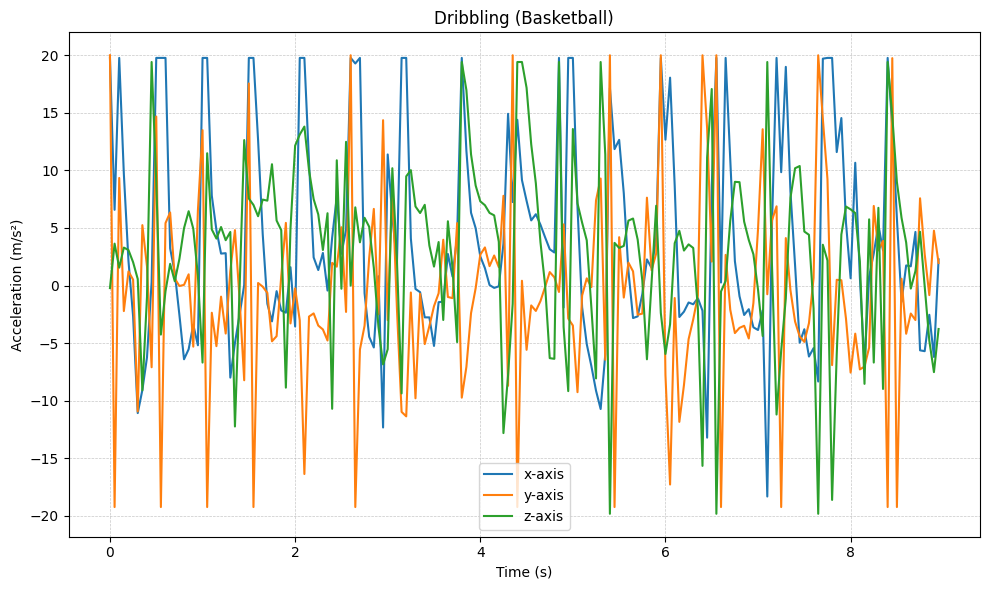

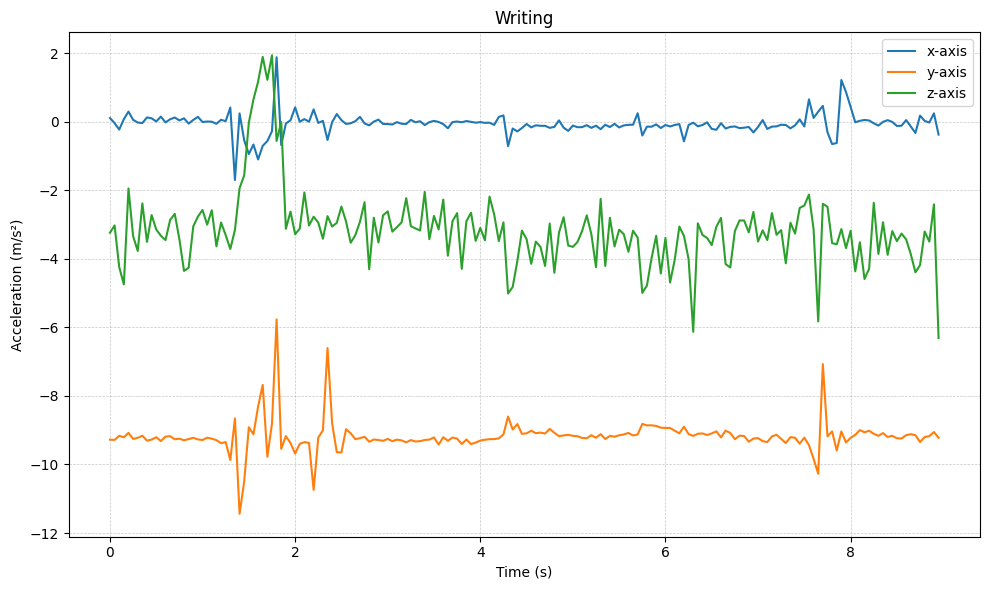

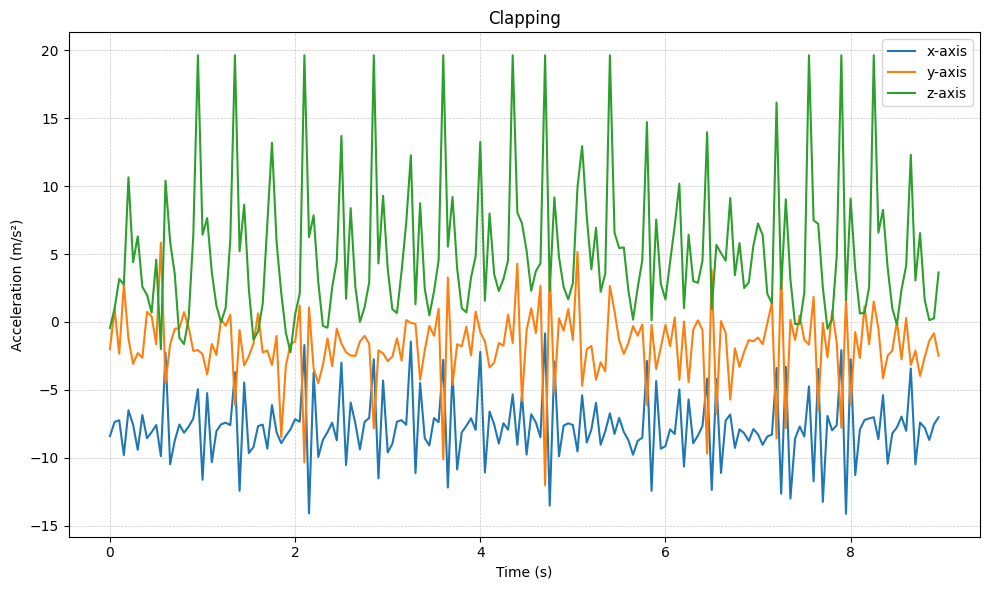

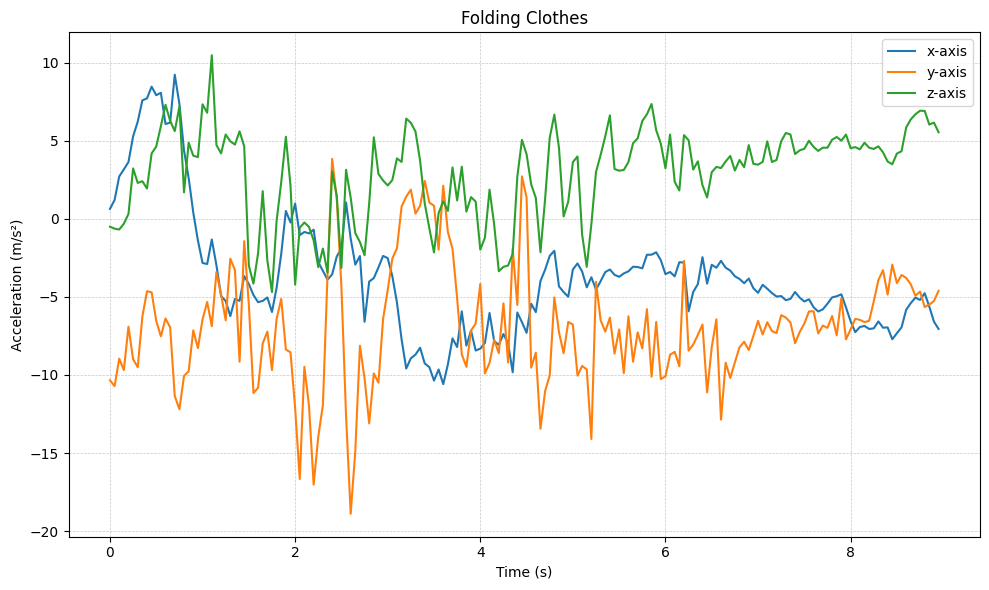

In [6]:
# plot the signals
for code, label in activities.items():
    w = windows[code]
    plt.figure(figsize=(10, 6))
    plt.plot(w["t"], w["x"], label="x-axis")
    plt.plot(w["t"], w["y"], label="y-axis")
    plt.plot(w["t"], w["z"], label="z-axis")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s²)")
    plt.title(label)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.tight_layout()